In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[ 1.07712031,  2.1463288 ,  1.07003339, -1.12865239, -0.8375613 ,
         0.11254456,  1.46441266,  2.45325493, -0.28248191,  1.43905566],
       [-0.48235716,  0.07090723, -0.20105741,  0.05728912,  0.35782842,
         0.19732358,  0.48665981, -0.77673742,  0.9512836 , -0.05637142]])

In [4]:
test_Features[:2]

array([[ 1.53520072, -0.44205029,  0.11930741, -0.13963844, -0.09372303,
        -1.18710315, -1.39110286,  0.56233423, -1.05776639,  0.97337276],
       [-0.11127804, -0.33829774,  0.41597285, -0.701429  , -0.7669781 ,
         0.64878416,  0.56005765, -0.48141731, -0.99315297,  0.30564737]])

In [5]:
train_Label[:4]

array([0, 0, 1, 0])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=20*7,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=20*6,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=20*5,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=20*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Conv1D(filters=20*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [19]:
model.add(MaxPooling1D(pool_size=1))

In [20]:
model.add(Conv1D(filters=20*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [21]:
model.add(MaxPooling1D(pool_size=1))

In [22]:
model.add(Conv1D(filters=20,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [23]:
model.add(MaxPooling1D(pool_size=1))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(10, activation='tanh'))

In [26]:
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 140)           280       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 140)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 120)           16920     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 120)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 100)           12100     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 100)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 80)            8080      
__________

In [28]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [29]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 13s 1ms/step - loss: 0.5897 - acc: 0.6977 - val_loss: 0.4651 - val_acc: 0.7858
Epoch 2/30
10194/10194 [==============================] - 13s 1ms/step - loss: 0.4217 - acc: 0.8050 - val_loss: 0.3879 - val_acc: 0.8344
Epoch 3/30
10194/10194 [==============================] - 10s 946us/step - loss: 0.3633 - acc: 0.8468 - val_loss: 0.3578 - val_acc: 0.8548
Epoch 4/30
10194/10194 [==============================] - 13s 1ms/step - loss: 0.3453 - acc: 0.8575 - val_loss: 0.3551 - val_acc: 0.8513
Epoch 5/30
10194/10194 [==============================] - 9s 916us/step - loss: 0.3423 - acc: 0.8549 - val_loss: 0.3441 - val_acc: 0.8619
Epoch 6/30
10194/10194 [==============================] - 9s 920us/step - loss: 0.3361 - acc: 0.8600 - val_loss: 0.3404 - val_acc: 0.8611
Epoch 7/30
10194/10194 [==============================] - 9s 894us/step - loss: 0.3304 - acc: 0.8645 - val_loss: 0.3371 - val

In [30]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

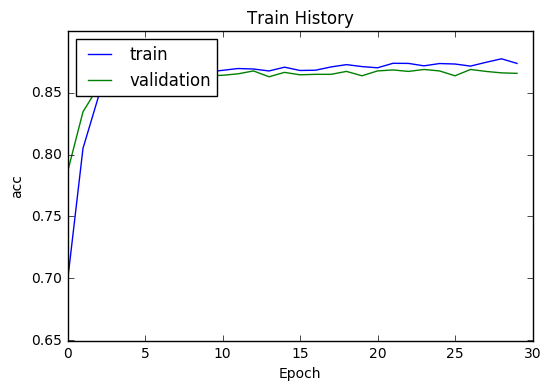

In [31]:
show_train_history(train_history,'acc','val_acc')

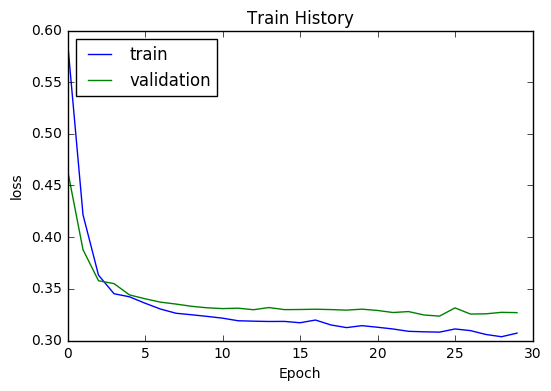

In [32]:
show_train_history(train_history,'loss','val_loss')

In [33]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 206us/step


In [34]:
scores[1]

0.8623546280165054